## A1

#### Imports

In [811]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, linear_model

#### Artificial Dataset

In [15]:
train_x = np.linspace(1.0, 10.0, num=100)[:, np.newaxis] 
train_y = np.sin(train_x) + 0.1 * np.power(train_x , 2) + 0.5 * np.random.randn(100, 1)

In [14]:
train_x[:5]

array([[ 1.        ],
       [ 1.09090909],
       [ 1.18181818],
       [ 1.27272727],
       [ 1.36363636]])

In [18]:
print(train_y[:5])

[[ 1.46912795]
 [ 1.44977228]
 [ 0.39722324]
 [ 1.13460275]
 [ 1.14766515]]


In [23]:
plt.figure()

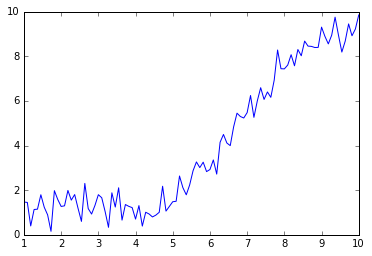

In [24]:
plt.plot(train_x, train_y)

#### MNIST data

In [25]:
with np.load("TINY_MNIST.npz") as data:
    x, t = data["x"], data["t"]
    x_eval, t_eval = data["x_eval"], data["t_eval"]

In [30]:
x.shape

(800, 64)

In [31]:
new_x = x.reshape((800, 8, 8))

In [32]:
new_x.shape

(800, 8, 8)

[ 0.]


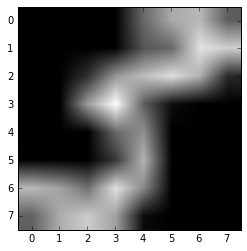

In [77]:
print(t[0])
plt.imshow(new_x[0])

[ 1.]


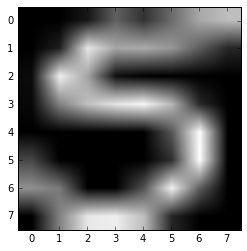

In [74]:
print(t[1])
plt.imshow(new_x[1])

### kNN

In [229]:
def distance_knn(a, b):
    '''
    Inputs:
        A: M x D array 
        B: N x D array
    '''
    
    a_squared = np.sum(a**2, axis=1) # M x 1
    b_squared = np.sum(b**2, axis=1) # N x 1
    a_times_b = np.dot(a, b.T)       # M x N

    return np.sqrt(a_squared[:, np.newaxis] + b_squared[np.newaxis, :] - 2*a_times_b)

In [230]:
def predict_knn(x_train, y_train, x_test, k):
    dist = distance(x_train, x_test)
    
    nearest = np.argsort(dist, axis=0)[:k,:]

    y_train = y_train.ravel()
    valid_labels = y_train[nearest]

    valid_labels = (np.mean(valid_labels, axis=0) >= 0.5).astype(np.int)

    return valid_labels

In [231]:
def score_knn(x_train, y_train, x_test, y_test, k):
    prediction = predict_knn(x_train, y_train, x_test, k)
    return np.sum(prediction == y_test.ravel())

### Task 1

In [792]:
validation_score = []
training_size = [5, 50, 100, 200, 400, 800]
num_neighbors = 1

In [793]:
for size in training_size:
    score = score_knn(x[:size], t.ravel()[:size], x_eval, t_eval.ravel(), num_neighbors)
    validation_score.append(score)

In [794]:
num_errors = 400 - np.array(validation_score)
num_errors

array([107,  40,  27,  17,   9,  12])

In [795]:
scores = num_errors / 400.0
scores

array([ 0.2675,  0.1   ,  0.0675,  0.0425,  0.0225,  0.03  ])

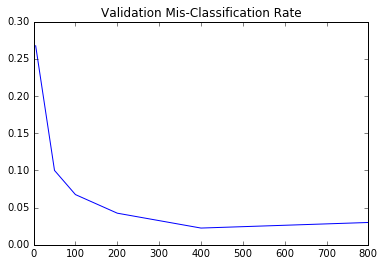

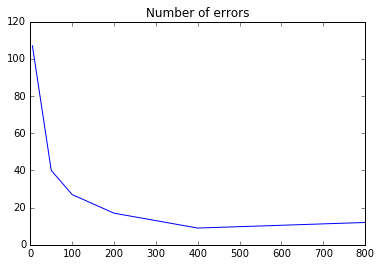

In [796]:
plt.figure()
plt.title('Validation Mis-Classification Rate')
plt.plot(training_size, scores)
plt.figure()
plt.title('Number of errors')
plt.plot(training_size, num_errors)

### Task 2

In [797]:
num_neighbors_array = [1, 3, 5, 7, 21, 101, 401]
scores = []

In [798]:
for num in num_neighbors_array:
    score = score_knn(x, t.ravel(), x_eval, t_eval.ravel(), num)

    scores.append(score)

In [799]:
scores

[388, 392, 390, 391, 389, 376, 349]

In [800]:
errors = 400 - np.array(scores)
errors

array([12,  8, 10,  9, 11, 24, 51])

In [801]:
scores = np.array(scores) / 400.0
scores

array([ 0.97  ,  0.98  ,  0.975 ,  0.9775,  0.9725,  0.94  ,  0.8725])

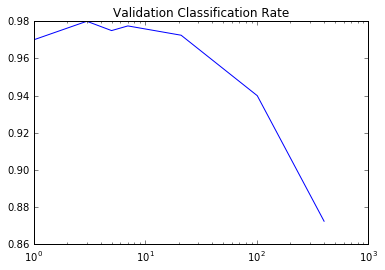

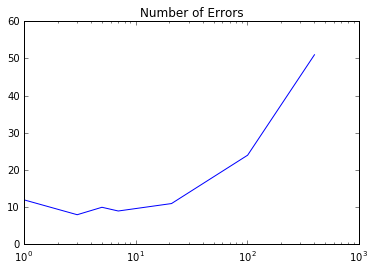

In [802]:
plt.figure()
plt.xscale('log')
plt.title('Validation Classification Rate')
plt.plot(num_neighbors_array, scores)
plt.figure()
plt.xscale('log')
plt.title('Number of Errors')
plt.plot(num_neighbors_array, errors)

### Task 3

In [803]:
def lr_predict(x_train, y_train):
    '''
    Inputs: 
        X: N x D
        Y: N x 1
    '''
    # 1: Train model by solving system of linear equations
    inputs = np.hstack((x_train, np.ones(y_train.shape))).T # D + 1 x N

    xxT = np.dot(inputs, inputs.T) # D + 1 x D + 1
    xxT_inv = np.linalg.inv(xxT)
    
    xy = np.dot(inputs, y_train) # D + 1 x 1
    w = np.dot(xxT_inv, xy) # D + 1 x 1
    
    # 2: Predict on training set
    return w, np.dot(w.T, inputs).T # N x 1

In [804]:
w, pred = lr_predict(train_x, train_y)
pred.shape

(100, 1)

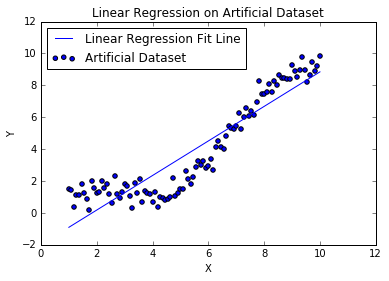

In [805]:
plt.plot(train_x, pred, label="Linear Regression Fit Line")
plt.scatter(train_x, train_y, label="Artificial Dataset")
plt.title("Linear Regression on Artificial Dataset")
plt.legend(loc=2)
plt.xlabel("X")
plt.ylabel("Y")

### Task 4

In [806]:
projected_x = np.hstack((train_x**5, train_x**4, train_x**3, train_x**2, train_x))

In [807]:
projected_x[:5][:]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.54505095,  1.4162967 ,  1.29827198,  1.19008264,  1.09090909],
       [ 2.30543741,  1.95075473,  1.65063862,  1.39669421,  1.18181818],
       [ 3.3394639 ,  2.62386449,  2.06160781,  1.61983471,  1.27272727],
       [ 4.7151213 ,  3.45775562,  2.53568745,  1.85950413,  1.36363636]])

In [808]:
w, pred = lr_predict(projected_x, train_y)
pred.shape

(100, 1)

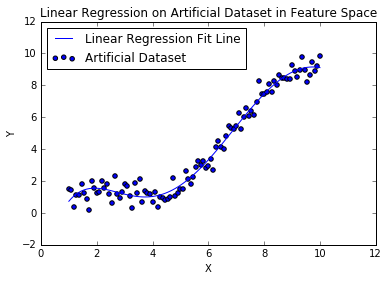

In [809]:
plt.scatter(train_x, train_y, label="Artificial Dataset")
plt.plot(train_x, pred, label="Linear Regression Fit Line")
plt.title("Linear Regression on Artificial Dataset in Feature Space")
plt.legend(loc=2)
plt.xlabel("X")
plt.ylabel("Y")

### Task 5

In [566]:
def lr_predict_sgd(x_train, y_train, x_test):
    '''
    Inputs: 
        X: N x D
        Y: N x 1
    '''
    # Set up training and test matrices, and weights vector.
    # Stack a vector of ones with the inputs, which are
    # multiplied by the bias (weight 0).
    inputs = np.hstack((x_train, np.ones(y_train.shape))).T # D + 1 x N
    test = np.hstack((x_test, np.ones((x_test.shape[0], 1)))).T # D + 1 x N
    weights = np.zeros(inputs.shape[0]) # 1 x D + 1
    
    # Hyper-parameters:
    num_iter = 100 # AKA num_epochs
    learning_rate = 0.001
    for i in range(num_iter):
        
        # Shuffle all indices so that the order of
        # our examples is random for each epoch
        examples = np.arange(inputs.shape[1]) # N
        np.random.shuffle(examples)
        
        for example in examples:
            # compute pred
            curr_pred = np.dot(weights, inputs)

            # compute derivative on mini batch of size one
            de_dw = (curr_pred[example] - y_train[example]) * inputs.T[example]
            
            # update weights
            weights = weights - learning_rate * de_dw.T
    
    # 2: Predict on test set
    return np.dot(weights, test).T # N x 1

In [567]:
num_valid_errors = []
training_set_size = [100, 200, 400, 800]

In [568]:
for size in training_set_size:
    pred = lr_predict_sgd(x[:size], t[:size], x_eval)
    num_valid_errors.append(t_eval.shape[0] - ((pred >= 0.5).astype(int) == t_eval.ravel()).sum())

In [569]:
num_valid_errors

[35, 24, 24, 23]

### Task 6

In [715]:
def lr_predict_sgd_per_epoch(x_train, y_train, x_test, y_test):
    '''
    Inputs: 
        X: N x D
        Y: N x 1
    '''
    # Set up training and test matrices, and weights vector.
    # Stack a vector of ones with the inputs, which are
    # multiplied by the bias (weight 0).
    inputs = np.hstack((x_train, np.ones(y_train.shape))).T # D + 1 x N
    test = np.hstack((x_test, np.ones((x_test.shape[0], 1)))).T # D + 1 x N
    weights = np.zeros(inputs.shape[0]) # 1 x D + 1
    
    # Hyper-parameters:
    num_iter = 100 # AKA num_epochs
    learning_rate = 0.002
    
    training_errors = []
    validation_errors = []
    
    for i in range(num_iter):
        
        # Shuffle all indices so that the order of
        # our examples is random for each epoch
        examples = np.arange(inputs.shape[1]) #N
        np.random.shuffle(examples)
        
        for example in examples:
            # compute pred
            curr_pred = np.dot(weights, inputs)

            # compute derivative on mini batch of size one
            de_dw = (curr_pred[example] - y_train[example]) * inputs.T[example]
            
            # update weights
            weights = weights - learning_rate * de_dw.T
    
        # Store results per epoch
        training_pred = np.dot(weights, inputs).T
        validation_pred = np.dot(weights, test).T
        
        training_errors.append(y_train.shape[0] - ((training_pred >= 0.5).astype(int) == y_train.ravel()).sum())
        validation_errors.append(y_test.shape[0] - ((validation_pred >= 0.5).astype(int) == y_test.ravel()).sum())
        
    return training_errors, validation_errors

In [716]:
t_error, v_error = lr_predict_sgd_per_epoch(x[:50], t[:50], x_eval, t_eval)

In [717]:
epochs = np.arange(100) # num_iter

In [718]:
v_error[-1]

46

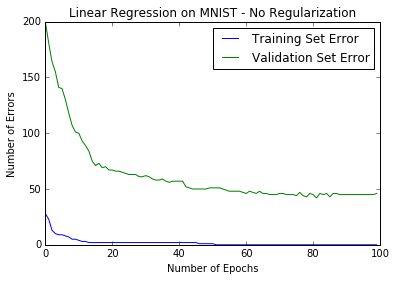

In [722]:
plt.plot(epochs, t_error, label="Training Set Error")
plt.plot(epochs, v_error, label="Validation Set Error")
plt.title("Linear Regression on MNIST - No Regularization")
plt.legend(loc=1)
plt.xlabel("Number of Epochs")
plt.ylabel("Number of Errors")

### Task 7

In [783]:
def lr_predict_sgd_reg(x_train, y_train, x_test, regularization):
    '''
    Inputs: 
        X: N x D
        Y: N x 1
    '''
    # Set up training and test matrices, and weights vector.
    # Stack a vector of ones with the inputs, which are
    # multiplied by the bias (weight 0).
    inputs = np.hstack((x_train, np.ones(y_train.shape))).T # D + 1 x N
    test = np.hstack((x_test, np.ones((x_test.shape[0], 1)))).T # D + 1 x N
    weights = np.zeros(inputs.shape[0])  # 1 x D + 1
    
    # Hyper-parameters:
    num_iter = 100 # AKA num_epochs
    learning_rate = 0.002
    for i in range(num_iter):
        
        # Shuffle all indices so that the order of
        # our examples is random for each epoch
        examples = np.arange(inputs.shape[1]) # N
        np.random.shuffle(examples)
        
        for example in examples:
            # compute pred
            curr_pred = np.dot(weights, inputs)

            # compute derivative on mini batch of size one
            de_dw = (curr_pred[example] - y_train[example]) * inputs.T[example] + regularization * weights
            
            # update weights
            weights = weights - learning_rate * de_dw.T
    
    # 2: Predict on test set
    return np.dot(weights, test).T # N x 1

In [789]:
regularizations = [0, 0.0001, 0.001, 0.01, 0.1, 0.5]
num_valid_errors = []

In [790]:
for reg in regularizations:
    pred = lr_predict_sgd_reg(x[:50], t[:50], x_eval, reg)
    num_valid_errors.append(t_eval.shape[0] - ((pred >= 0.5).astype(int) == t_eval.ravel()).sum())

In [791]:
num_valid_errors

[45, 45, 45, 45, 52, 82]